In [1]:
import os
import pandas as pd
import numpy as np
import requests
import ta
from bs4 import BeautifulSoup
import re

In [2]:
def stock_history(ticker, year, month):
    df = pd.DataFrame()
    key = 'apikey=4oM5qRWVBMQVMc6qeccvuy5I6I4QuIpi'
    start_date = f'{year}-{month:02d}-01'
    month_range = pd.date_range(start=start_date, periods=1, freq='M')
    end_date = month_range[0]
    end_date = (pd.to_datetime(start_date, format='%Y-%m-%d') + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')    
    url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?from={start_date}&to={end_date}&{key}'
    #requests.get(url)
    res = requests.get(url)
    history = res.json()
    df = pd.DataFrame(history['historical'])
    return df
    
stock_history('F', 2024, 8)#.head()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2024-08-30,11.15,11.23,11.06,11.19,10.69,44977100,44977100,0.040,0.358740,11.1575,"August 30, 24",0.003587
1,2024-08-29,11.02,11.20,10.99,11.11,10.61,44989200,44989200,0.090,0.816700,11.0800,"August 29, 24",0.008167
2,2024-08-28,11.10,11.19,10.98,11.04,10.55,35442200,35442200,-0.060,-0.540540,11.0775,"August 28, 24",-0.005405
3,2024-08-27,11.12,11.22,10.99,11.14,10.64,44841000,44841000,0.020,0.179860,11.1175,"August 27, 24",0.001799
4,2024-08-26,11.32,11.37,11.07,11.11,10.61,53070331,53070331,-0.210,-1.860000,11.2175,"August 26, 24",-0.018600
5,2024-08-23,10.98,11.28,10.94,11.27,10.77,64612700,64612700,0.290,2.640000,11.1175,"August 23, 24",0.026400
6,2024-08-22,10.85,11.01,10.84,10.92,10.43,50885400,50885400,0.070,0.645160,10.9050,"August 22, 24",0.006452
7,2024-08-21,10.84,10.97,10.75,10.85,10.37,48943900,48943900,0.015,0.092251,10.8525,"August 21, 24",0.000923
8,2024-08-20,10.70,10.79,10.61,10.68,10.20,32468000,32468000,-0.020,-0.186920,10.6950,"August 20, 24",-0.001869
9,2024-08-19,10.56,10.75,10.54,10.72,10.24,41066305,41066305,0.160,1.520000,10.6425,"August 19, 24",0.015200


In [3]:
def stock_stats(history):
    change = (history.iloc[0].close - history.iloc[-1].open) / history.iloc[-1].open
    percent_change = change * 100
    symbol = '+' if change >= 0 else '-'
    change_str = f"{percent_change:{symbol}.2f}%"
    history['avg_price'] = (history['high']+history['low']) / 2
    history['total_avg'] = history['avg_price'] * history['volume']
    total = history['total_avg'].sum()
    total_str = f"{total / 1e9:.2f}B"
    return change_str, total_str
    #for i in range (len(history)):
          
    #return history.loc[0]
    
stock_stats(stock_history('F', 2024, 8))

('+3.04%', '13.16B')

In [5]:
import pandas as pd
import ta

def multi_month_stock(ticker, start_year, start_month, num_months):
    dfs = []
    
    for i in range(num_months):
        year = start_year + ((start_month - 1 + i) // 12)
        month = ((start_month - 1 + i) % 12) + 1
        
        df = stock_history(ticker, year, month)
        dfs.append(df)
    
    full_history = pd.concat(dfs, ignore_index=True)
    full_history.sort_values('date', ascending=True, inplace=True)
    
    # Add indicators
    full_history['SMA_20'] = ta.trend.sma_indicator(full_history['close'], window=20)
    full_history['RSI'] = ta.momentum.rsi(full_history['close'], window=14)
    
    return full_history


In [6]:
history = multi_month_stock('F', 2024, 6, 3)
print(history[['date', 'close', 'SMA_20', 'RSI']].tail(10))

          date  close   SMA_20        RSI
50  2024-08-19  10.72  10.7300  43.413759
49  2024-08-20  10.68  10.5725  42.838887
48  2024-08-21  10.85  10.4315  46.105248
47  2024-08-22  10.92  10.4195  47.437161
46  2024-08-23  11.27  10.4235  53.610298
45  2024-08-26  11.11  10.4285  50.680073
44  2024-08-27  11.14  10.4435  51.218460
43  2024-08-28  11.04  10.4545  49.287078
42  2024-08-29  11.11  10.4755  50.688825
41  2024-08-30  11.19  10.5335  52.311175


In [7]:
def calculate_moving_averages(df, sma_windows=[10, 20], ema_windows=[12, 26]):
    for window in sma_windows:
        df[f'SMA_{window}'] = ta.trend.sma_indicator(df['close'], window=window)
    for window in ema_windows:
        df[f'EMA_{window}'] = ta.trend.ema_indicator(df['close'], window=window)
    return df

def calculate_rsi(df, window=14):
    df[f'RSI_{window}'] = ta.momentum.rsi(df['close'], window=window)
    return df

def calculate_macd(df):
    df['MACD'] = ta.trend.macd(df['close'])
    df['MACD_signal'] = ta.trend.macd_signal(df['close'])
    return df
    
def calculate_bollinger_bands(df, window=20):
    bb = ta.volatility.BollingerBands(df['close'], window=window)
    df['BB_upper'] = bb.bollinger_hband()
    df['BB_lower'] = bb.bollinger_lband()
    df['BB_percent'] = bb.bollinger_pband()
    return df

def calculate_volatility(df, window=14):
    df['Volatility'] = df['close'].rolling(window=window).std()
    df['ATR'] = ta.volatility.average_true_range(df['high'], df['low'], df['close'], window=window)
    return df

def calculate_obv(df):
    df['OBV'] = ta.volume.on_balance_volume(df['close'], df['volume'])
    return df

def calculate_daily_returns(df):
    df['Daily_Return'] = df['close'].pct_change() * 100
    return df

def calculate_cumulative_return(df):
    df['Cumulative_Return'] = (1 + df['close'].pct_change()).cumprod() - 1
    return df
    
def calculate_sharpe_ratio(df, risk_free_rate=0.01):
    daily_return = df['close'].pct_change()
    sharpe_ratio = (daily_return.mean() - risk_free_rate/252) / daily_return.std()
    return sharpe_ratio * (252 ** 0.5)  # Annualized


In [8]:
def export_analysis(df, filename='stock_analysis.csv'):
    df.to_csv(filename, index=False)
    print(f"Exported analysis to {filename}")

In [9]:
def summary_statistics(df):
    return df['close'].describe()

In [10]:
def predict_next_day_moving_avg(df, window=5):
    last_avg = df['close'].tail(window).mean()
    print(f"Predicted next close price (moving avg {window} days): {last_avg:.2f}")
    return last_avg


In [11]:
history = multi_month_stock('F', 2024, 6, 3)

history = calculate_moving_averages(history)
history = calculate_rsi(history)
history = calculate_macd(history)
history = calculate_bollinger_bands(history)
history = calculate_volatility(history)
history = calculate_obv(history)
history = calculate_daily_returns(history)
history = calculate_cumulative_return(history)

print(summary_statistics(history))

predict_next_day_moving_avg(history)

export_analysis(history)

count    63.000000
mean     11.855397
std       1.324736
min       9.710000
25%      10.845000
50%      11.940000
75%      12.800000
max      14.550000
Name: close, dtype: float64
Predicted next close price (moving avg 5 days): 11.12
Exported analysis to stock_analysis.csv


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
def prepare_data(df, n_lag=5):
    df = df.copy()
    
    # Create lag features
    for i in range(1, n_lag+1):
        df[f'lag_{i}'] = df['close'].shift(i)
    
    # Drop NaN values due to lagging
    df.dropna(inplace=True)
    
    # Features & target
    features = df[[f'lag_{i}' for i in range(1, n_lag+1)]]
    target = df['close']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)
    
    return X_scaled, target.values, scaler

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def train_predict_lr_rf(X, y):
    # Split into train/test
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_preds = lr.predict(X_test)
    
    # Random Forest
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    
    print(f"Linear Regression RMSE: {mean_squared_error(y_test, lr_preds, squared=False):.4f}")
    print(f"Random Forest RMSE: {mean_squared_error(y_test, rf_preds, squared=False):.4f}")
    
    return y_test, lr_preds, rf_preds

In [15]:
def prepare_lstm_data(df, n_lag=5):
    df = df.copy()
    
    # Create lag features
    for i in range(1, n_lag+1):
        df[f'lag_{i}'] = df['close'].shift(i)
    
    df.dropna(inplace=True)
    
    X = df[[f'lag_{i}' for i in range(1, n_lag+1)]].values
    y = df['close'].values
    
    # Reshape for LSTM
    X_lstm = X.reshape((X.shape[0], X.shape[1], 1))
    
    split = int(len(X) * 0.8)
    X_train, X_test = X_lstm[:split], X_lstm[split:]
    y_train, y_test = y[:split], y[split:]
    
    return X_train, X_test, y_train, y_test

In [16]:
from sklearn.metrics import root_mean_squared_error

def train_predict_lr_rf(X, y):
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    
    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_preds = lr.predict(X_test)
    
    # Random Forest
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    
    print(f"Linear Regression RMSE: {root_mean_squared_error(y_test, lr_preds):.4f}")
    print(f"Random Forest RMSE: {root_mean_squared_error(y_test, rf_preds):.4f}")
    
    return y_test, lr_preds, rf_preds


In [17]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def prepare_lstm_data(df, n_lag=5):
    df = df.copy()
    
    # Create lag features
    for i in range(1, n_lag+1):
        df[f'lag_{i}'] = df['close'].shift(i)
    
    df.dropna(inplace=True)
    
    X = df[[f'lag_{i}' for i in range(1, n_lag+1)]].values
    y = df['close'].values
    
    # Reshape for LSTM
    X_lstm = X.reshape((X.shape[0], X.shape[1], 1))
    
    split = int(len(X) * 0.8)
    X_train, X_test = X_lstm[:split], X_lstm[split:]
    y_train, y_test = y[:split], y[split:]
    
    return X_train, X_test, y_train, y_test

def train_predict_lstm(X_train, X_test, y_train, y_test, epochs=50):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    preds = model.predict(X_test).flatten()
    
    from sklearn.metrics import mean_squared_error
    print(f"LSTM RMSE: {mean_squared_error(y_test, preds, squared=False):.4f}")
    
    return y_test, preds

In [22]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

history = multi_month_stock('F', 2024, 6, 6)

X, y, scaler = prepare_data(history)

y_test, lr_preds, rf_preds = train_predict_lr_rf(X, y)

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = prepare_lstm_data(history)
y_test_lstm, lstm_preds = train_predict_lstm(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, epochs=50)

Linear Regression RMSE: 0.2339
Random Forest RMSE: 0.2427
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
LSTM RMSE: 0.4569


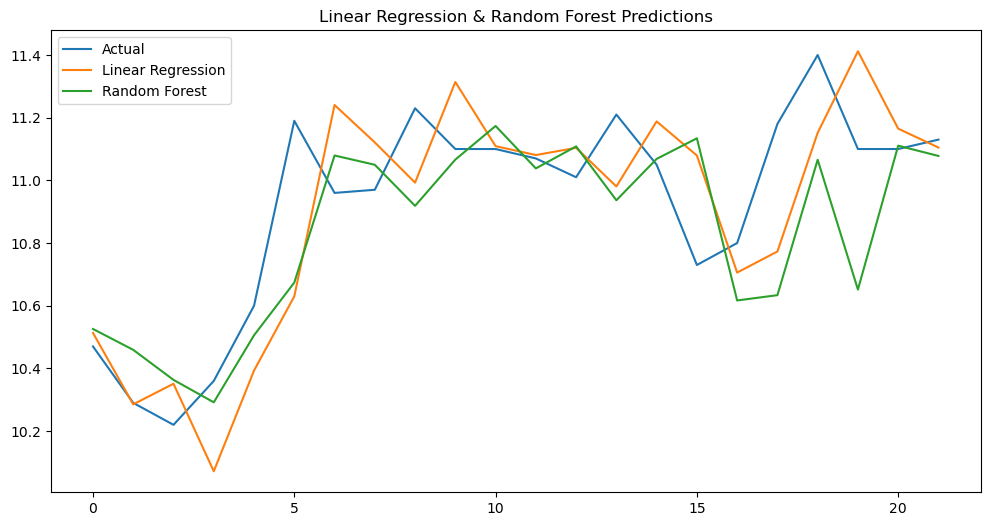

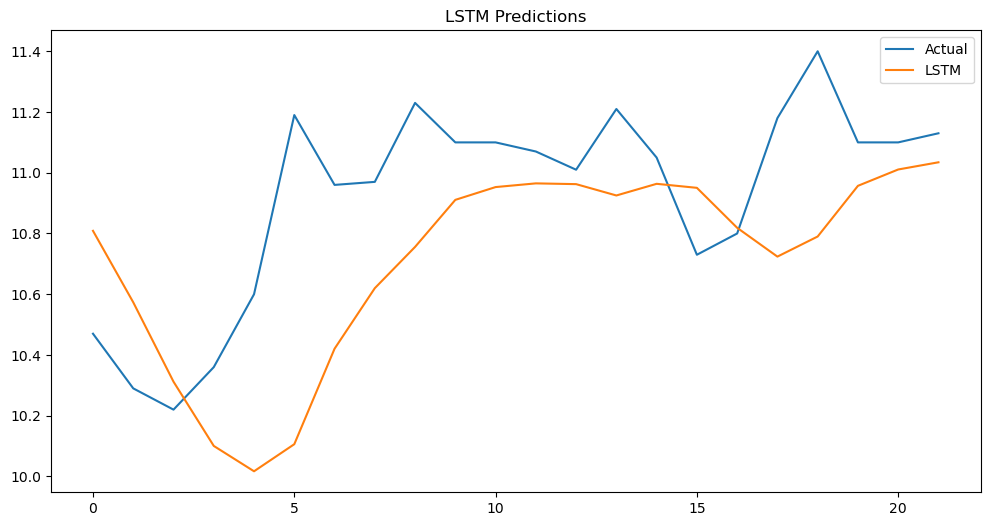

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(lr_preds)), lr_preds, label='Linear Regression')
plt.plot(range(len(rf_preds)), rf_preds, label='Random Forest')
plt.legend()
plt.title("Linear Regression & Random Forest Predictions")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(len(y_test_lstm)), y_test_lstm, label='Actual')
plt.plot(range(len(lstm_preds)), lstm_preds, label='LSTM')
plt.legend()
plt.title("LSTM Predictions")
plt.show()